In [1]:
import tensorflow as tf

In [2]:
from tensorflow.examples.tutorials.mnist import input_data

In [3]:
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py fr

In [5]:
type(mnist)

tensorflow.contrib.learn.python.learn.datasets.base.Datasets

Tamaño de una imagen

In [9]:
mnist.train.num_examples

55000

In [10]:
mnist.test.num_examples

10000

### Visualizar los datos

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

In [12]:
mnist.train.images[1].shape

(784,)

In [32]:
mnist.train.labels[200]

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0.])

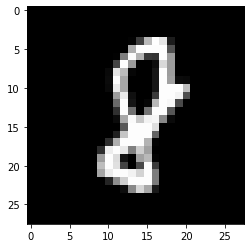

In [17]:
plt.imshow(mnist.train.images[200].reshape(28,28), cmap='gray')

In [18]:
mnist.train.images[200].max()

1.0

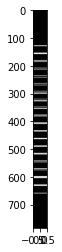

In [21]:
plt.imshow(mnist.train.images[200].reshape(784,1), cmap='gray', aspect=0.02)

### Crear modelo

Entrada

In [22]:
x = tf.placeholder(tf.float32, shape=[None, 784])

Pesos y bias

In [23]:
W = tf.Variable(tf.zeros([784, 10]))
b = tf.Variable(tf.zeros([10]))

Instructions for updating:
Colocations handled automatically by placer.


Red

In [24]:
y = tf.matmul(x,W) + b

Optimizador

In [25]:
y_true = tf.placeholder(tf.float32, [None, 10])

In [26]:
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y_true, logits=y) )

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



In [27]:
opt = tf.train.GradientDescentOptimizer(learning_rate=0.3)

In [28]:
train = opt.minimize(loss)

### Session

In [29]:
init = tf.global_variables_initializer()

In [33]:
matches = tf.equal(tf.argmax(y, 1), tf.argmax(y_true,1))
acc = tf.reduce_mean(tf.cast(matches, tf.float32))

In [40]:
losses = []

with tf.Session() as sess:
    sess.run(init)
    
    for step in range(1000):
        batch_x, batch_y = mnist.train.next_batch(100)
        _, loss_ = sess.run([train, loss], feed_dict={x:batch_x, y_true:batch_y})
        losses.append(loss_)
    
    acc_ = sess.run(acc, feed_dict={x:mnist.test.images, y_true:mnist.test.labels})
    print(acc_)
    

0.9186


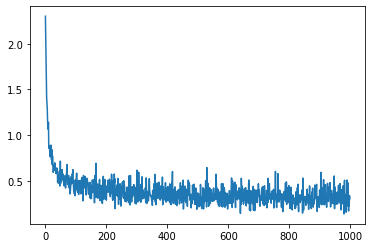

In [41]:
plt.plot(losses)